a.Load the image ‘beach.jpg’, convert it into grayscale using inbuilt functions.
b.Show the histogram of the image.
c. Choose a threshold from the image histogram and output the binary version of the
image.

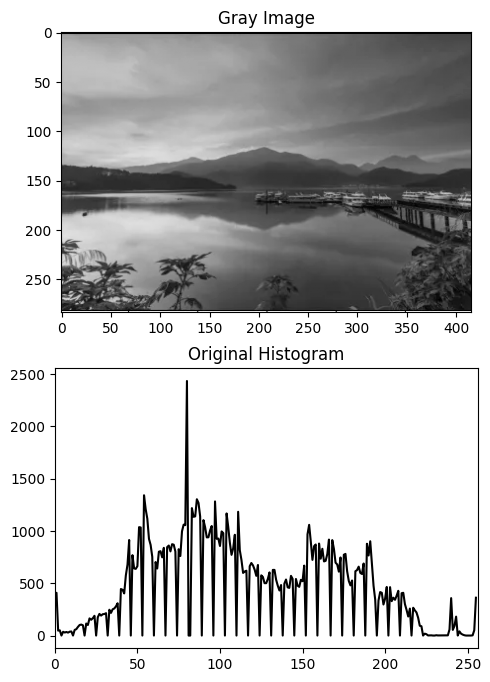

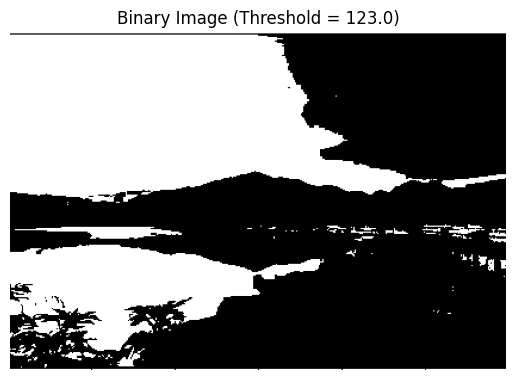

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image

image_path = 'beach.png'
embedded_image = Image(filename=image_path)
embedded_image

nparr = np.frombuffer(embedded_image.data, np.uint8)
gray_image = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)



hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])


threshold_value, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Gray Image')
plt.imshow(gray_image, cmap='gray')


plt.subplot(2, 2, 3)
plt.title('Original Histogram')
plt.plot(hist, color='black')
plt.xlim([0, 256])

plt.xlim([0, 256])

plt.show()

plt.imshow(binary_image, cmap='gray')
plt.title(f'Binary Image (Threshold = {threshold_value})')
plt.axis('off')
plt.show()

a. Load the image beach.png’ and convert it into grayscale.
b. Display its histogram. What do you notice about image quality from histogram? 
c. Multiply the image by a positive real: what happens on the image and its
histogram? Adjust the intensity range of the image to be the same as the original
image.
d. Perform an histogram equalization on the grayscale ‘haze.png’ and its multiplied
version and display the image.

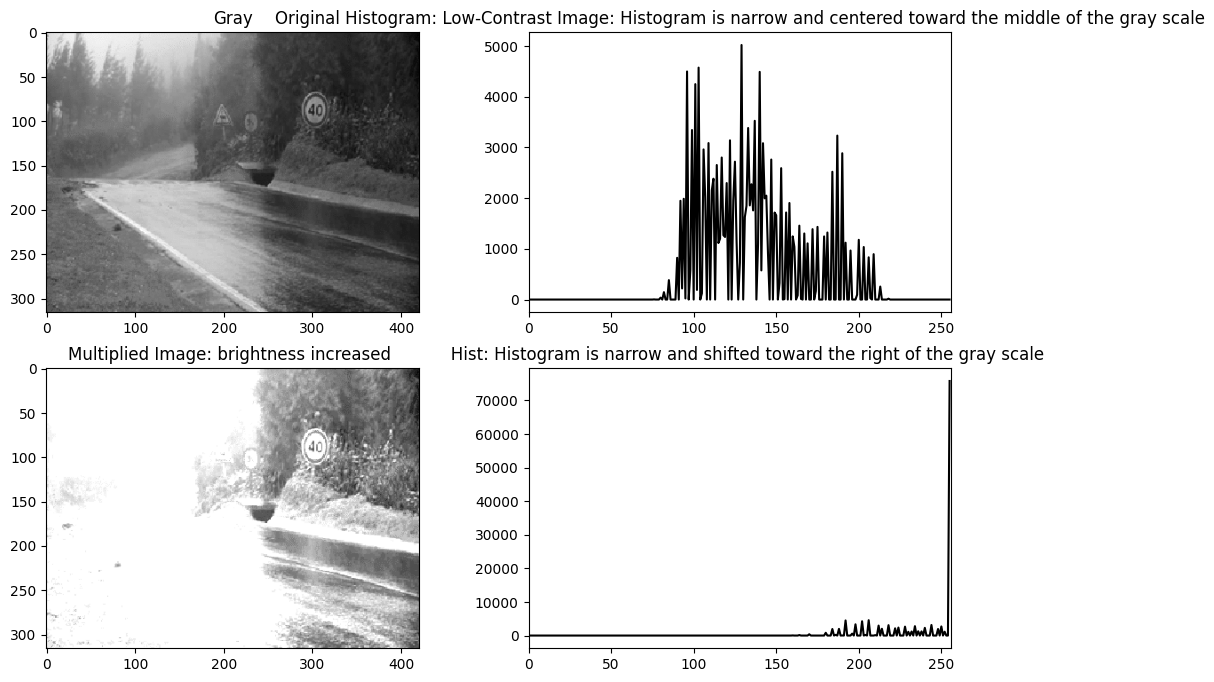

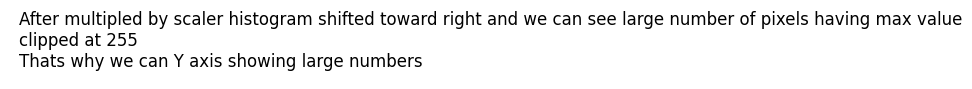

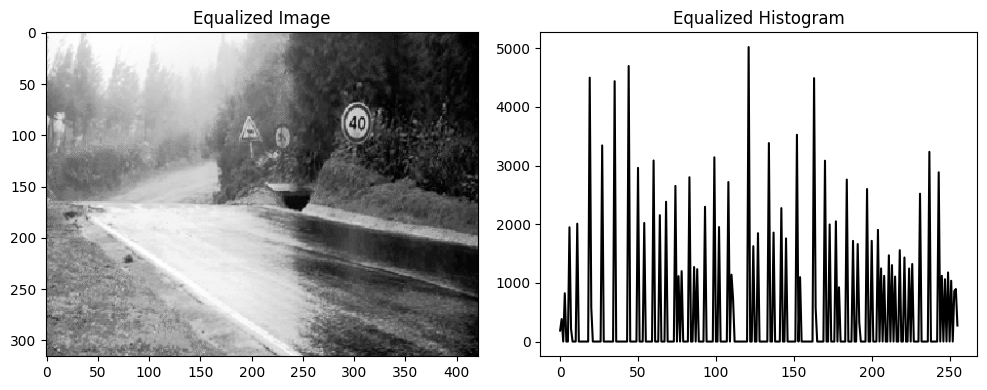

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image

image_path = 'haze.png'
embedded_image = Image(filename=image_path)
embedded_image

nparr = np.frombuffer(embedded_image.data, np.uint8)
gray_image = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)



hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Gray')
plt.imshow(gray_image, cmap='gray')



plt.subplot(2, 2, 2)
plt.title('Original Histogram: Low-Contrast Image: Histogram is narrow and centered toward the middle of the gray scale')
plt.plot(hist, color='black')
plt.xlim([0, 256])

scaler = 2.0 
multiplied = gray_image.astype(np.float32) * scaler

multiplied_clipped = np.clip(multiplied, 0, 255).astype(np.uint8)

plt.subplot(2, 2, 3)
plt.title('Multiplied Image: brightness increased ')
plt.imshow(multiplied_clipped, cmap='gray')

hist_multipled = cv2.calcHist([multiplied_clipped], [0], None, [256], [0, 256])

plt.subplot(2, 2, 4)
plt.title('   Hist: Histogram is narrow and shifted toward the right of the gray scale')
plt.plot(hist_multipled, color='black')
plt.xlim([0, 256])

plt.show()
fig, ax = plt.subplots(figsize=(10, 1))
ax.axis('off')  

# Tell the story step-by-step
story = (
    "After multipled by scaler histogram shifted toward right and we can see large number of pixels having max value clipped at 255\n"
    "Thats why we can Y axis showing large numbers"
)

# Add the text to the plot
ax.text(0.01, 0.98, story, fontsize=12, va='top', ha='left', wrap=True)

plt.tight_layout()
plt.show()


equalized_image  = cv2.equalizeHist(gray_image)
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])


# Create side-by-side subplots
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

# Left plot
axes[0].imshow(equalized_image, cmap='gray')
axes[0].set_title('Equalized Image')

# Right plot
axes[1].plot(hist_equalized, color='black')
axes[1].set_title('Equalized Histogram')

plt.tight_layout()
plt.show()


